In [1]:
import numpy as np
import pywt
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

%matplotlib inline

## Завдання А

### Вейвлет Хаара

In [2]:
def base_haar_wavelet(x):
    return 1 if 0 <= x < 1/2 else -1 if 1/2 <= x < 1 else 0

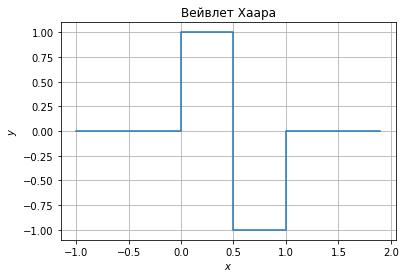

In [3]:
x = np.arange(-1, 2 , 0.1)
y = list(map(base_haar_wavelet, x))
plt.grid(True)
plt.title('Вейвлет Хаара')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.step(x, y);

### Вейвлет Шенона

In [4]:
def sinc(x):
    return np.sin(np.pi * x) / (np.pi * x)

In [5]:
def base_shannon_wavelet(x):
    return sinc(x/2) * np.cos(3*np.pi*x/2)

In [6]:
x = np.arange(-10, 10 , 0.1)
y = list(map(base_shannon_wavelet, x))

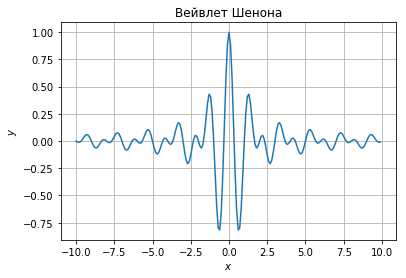

In [7]:
plt.grid(True)
plt.title('Вейвлет Шенона')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(x, y);

### Вейвлет Гаусса

In [35]:
def base_gaussian_wavelet(x):
    return np.exp((-x**2)/2)

In [36]:
x = np.arange(-5, 5 , 0.1)
y = list(map(base_gaussian_wavelet, x))

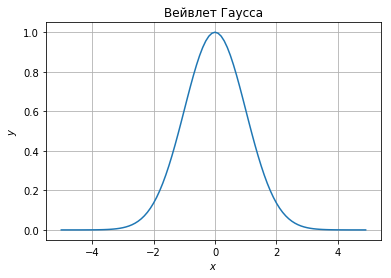

In [37]:
plt.grid(True)
plt.title('Вейвлет Гаусса')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(x, y);

## Завдання Б

In [11]:
num_group = 20 
num_student = 10
n = int(num_group / 2)
N = 2**n 

M = num_student
M1 = N

In [12]:
s1 = 2 * np.random.rand(N) + \
         num_group * np.cos(2 * num_student * np.pi * np.arange(N) / N)*(1+0.1*np.random.rand(N)) + \
         17 * np.cos(((4 * num_student * np.pi * np.arange(N))/N) + np.random.rand(N)) + \
         3 * np.cos((5 * num_student * np.pi * np.arange(N)) / N) * (np.random.rand(N)+num_group)

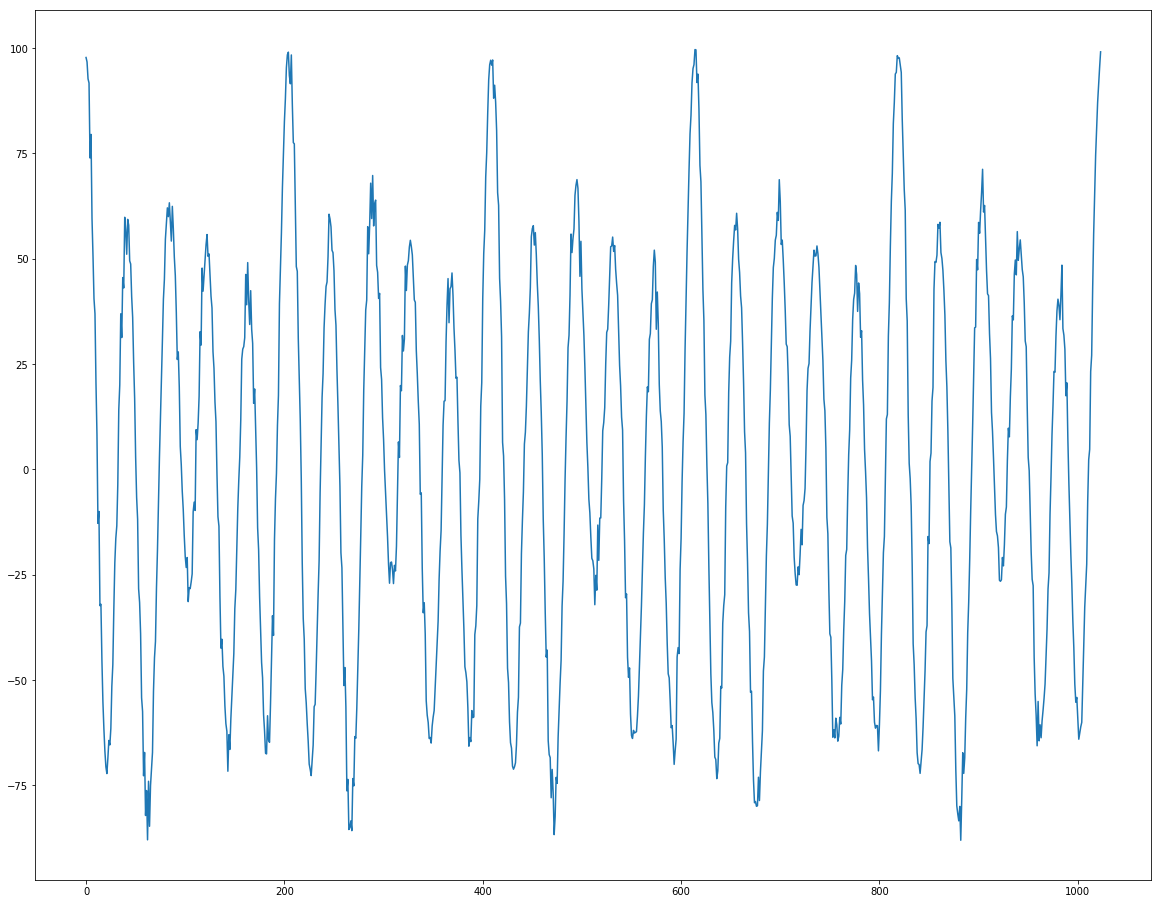

In [13]:
plt.figure(figsize=(20, 16))
plt.plot(np.arange(len(s1)), s1);

### Вейвлет Хаара

In [15]:
def f2(j, k, x):
    return (2 ** (j/2)) * base_haar_wavelet((2**j) * x - k)

In [28]:
W = np.zeros((M, M1))
for l in tqdm_notebook(range(M)):
    for j in range(M1):        
        res = 0
        for i in range(N):
            res += s1[i] * f2(l, j, i)
        W[l, j] = res

A Jupyter Widget

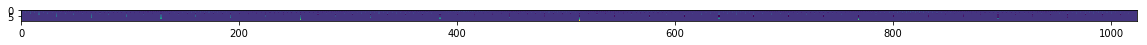

In [29]:
plt.figure(figsize=(20, 10))
plt.imshow(W);

In [30]:
d = []
for i in tqdm_notebook(range(N)):
    res = 0
    for l in range(M):
        for j in range(M1):
            res += W[l, j] * f2(l, j, i) / (2**(2*l))
    d.append(res)

A Jupyter Widget

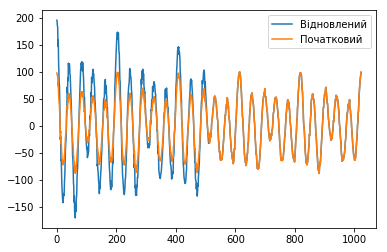

In [43]:
plt.plot(np.arange(len(d)), d, label='Відновлений')
plt.plot(np.arange(len(d)), s1, label='Початковий')
plt.legend();

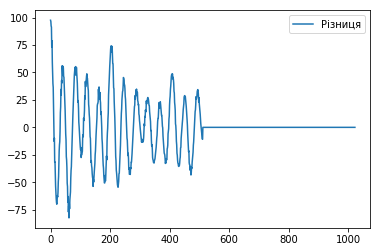

In [44]:
plt.plot(np.arange(len(d)), d-s1, label="Різниця")
plt.legend();

### Вейвлет Гаусса

In [38]:
def f2(j, k, x):
    return (2 ** (j/2)) * base_gaussian_wavelet((2**j) * x - k)

In [39]:
W = np.zeros((M, M1))
for l in tqdm_notebook(range(M)):
    for j in range(M1):        
        res = 0
        for i in range(N):
            res += s1[i] * f2(l, j, i)
        W[l, j] = res

A Jupyter Widget

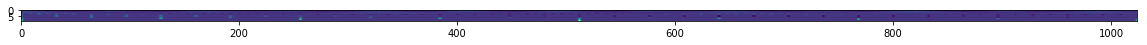

In [53]:
plt.figure(figsize=(20, 20))
plt.imshow(W);

In [46]:
d = []
for i in tqdm_notebook(range(N)):
    res = 0
    for l in range(M):
        for j in range(M1):
            res += W[l, j] * f2(l, j, i) / (2**(2*l))
    d.append(res)

A Jupyter Widget

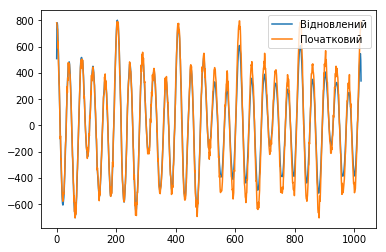

In [54]:
plt.plot(np.arange(len(d)), d, label='Відновлений')
plt.plot(np.arange(len(d)), 8*s1, label='Початковий')
plt.legend();

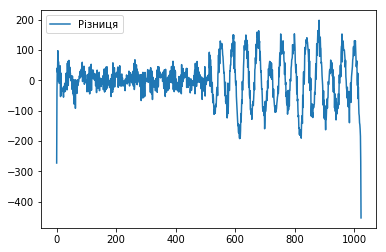

In [57]:
plt.plot(np.arange(len(d)), d-8*s1, label="Різниця")
plt.legend();